# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&appid=" +weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | carutapera
Processing Record 3 of Set 1 | santa ana
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | tabuk
Processing Record 7 of Set 1 | tolanaro
Processing Record 8 of Set 1 | darjiling
Processing Record 9 of Set 1 | chechat
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | utrik
Processing Record 12 of Set 1 | galesong
Processing Record 13 of Set 1 | lihue
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | bayganin
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | qaqortoq
Processing Record 19 of Set 1 | cidreira
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | mount pearl
Processing Record 22 of Set 1 | puerto san carlos
City not foun

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.25,87,91,12.35,TF,1720754522
1,carutapera,-1.1950,-46.0200,25.47,82,39,3.07,BR,1720754523
2,santa ana,33.7456,-117.8678,27.37,79,20,4.12,US,1720754524
3,bethel,41.3712,-73.4140,23.83,79,20,1.54,US,1720754369
4,adamstown,-25.0660,-130.1015,22.39,87,100,10.83,PN,1720754527


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.25,87,91,12.35,TF,1720754522
1,carutapera,-1.1950,-46.0200,25.47,82,39,3.07,BR,1720754523
2,santa ana,33.7456,-117.8678,27.37,79,20,4.12,US,1720754524
3,bethel,41.3712,-73.4140,23.83,79,20,1.54,US,1720754369
4,adamstown,-25.0660,-130.1015,22.39,87,100,10.83,PN,1720754527


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

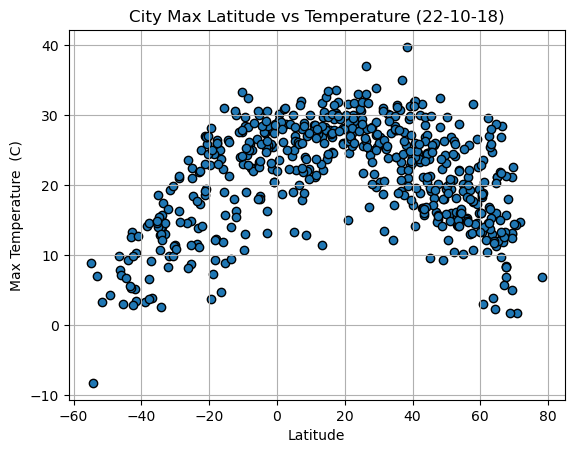

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df['Lat'], 
    city_data_df['Max Temp'],
    edgecolors='black',
    marker='o',
    linewidths=1
)

# Incorporate the other graph properties
plt.title('City Max Latitude vs Temperature (22-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature  (C)')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

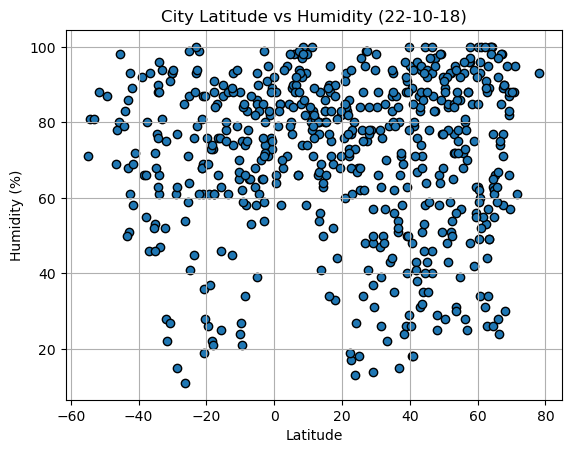

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df['Lat'], 
    city_data_df['Humidity'],
    edgecolors='black',
    marker='o',
    linewidths=1
)


# Incorporate the other graph properties
plt.title('City Latitude vs Humidity (22-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

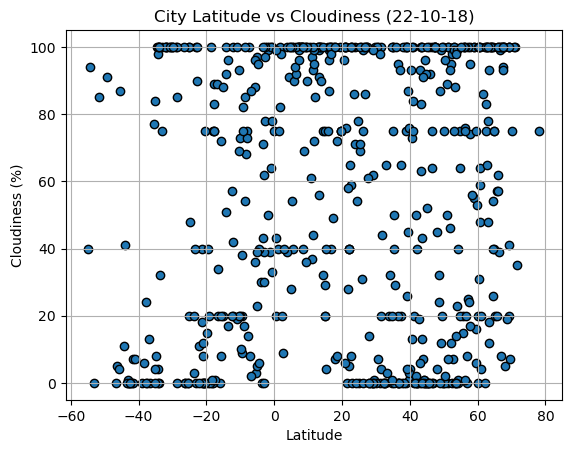

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df['Lat'], 
    city_data_df['Cloudiness'],
    edgecolors='black',
    marker='o',
    linewidths=1
)

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness (22-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

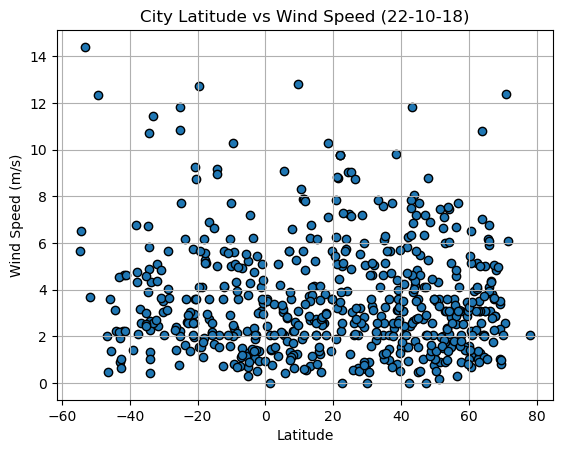

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df['Lat'], 
    city_data_df['Wind Speed'],
    edgecolors='black',
    marker='o',
    linewidths=1
)

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed (22-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x, y, title, text_coordinates):
    
    # linear regression
    (slope, intercept, rvalue, pvalue, std) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #y = 2x + 28 were 28 is they y-intercept and 2 is the clope of the graph

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    print(f" r-value is: {rvalue**2}")
    plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,santa ana,33.7456,-117.8678,27.37,79,20,4.12,US,1720754524
3,bethel,41.3712,-73.4140,23.83,79,20,1.54,US,1720754369
5,tabuk,17.4189,121.4443,30.27,69,49,2.57,PH,1720754528
7,darjiling,27.0333,88.2667,16.81,99,100,0.56,IN,1720754530
8,chechat,24.7667,75.8833,30.54,68,78,7.22,IN,1720754532


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.25,87,91,12.35,TF,1720754522
1,carutapera,-1.1950,-46.0200,25.47,82,39,3.07,BR,1720754523
4,adamstown,-25.0660,-130.1015,22.39,87,100,10.83,PN,1720754527
6,tolanaro,-25.0319,46.9987,21.04,64,20,11.83,MG,1720754529
11,galesong,-5.3166,119.3661,30.01,58,3,1.27,ID,1720754535


###  Temperature vs. Latitude Linear Regression Plot

 r-value is: 0.34820699401660293


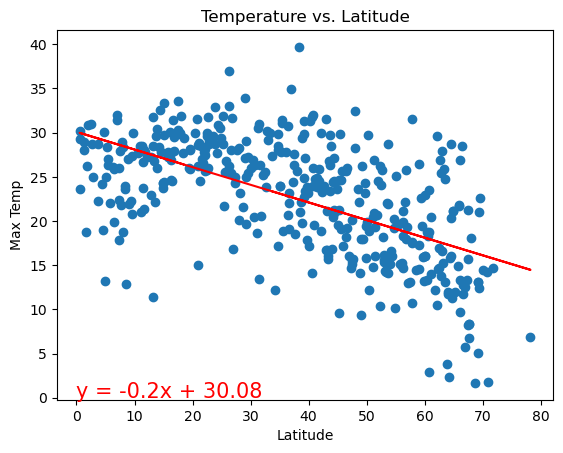

In [20]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df['Max Temp']
plot_linear_regression(x, y, "Latitude", "Max Temp", "Temperature vs. Latitude", (0,0))

 r-value is: 0.548869300560552


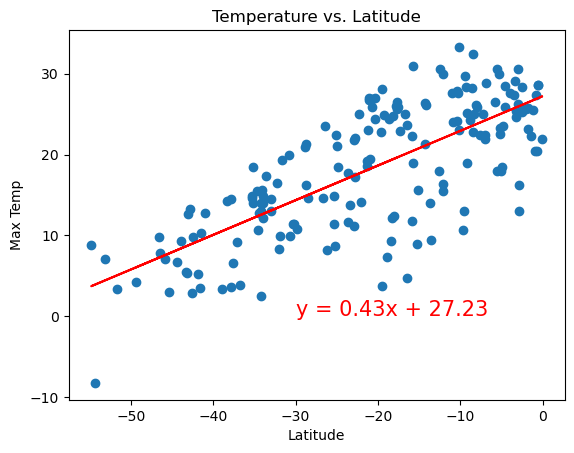

In [21]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df['Max Temp']
plot_linear_regression(x, y, "Latitude", "Max Temp", "Temperature vs. Latitude", (-30,0))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

 r-value is: 0.007570119375928748


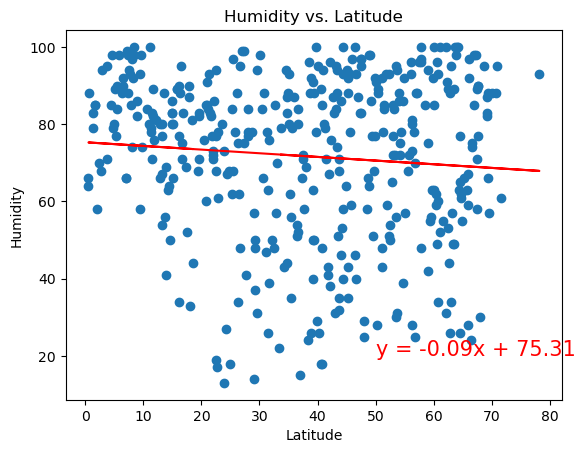

In [22]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df['Humidity']
plot_linear_regression(x, y, "Latitude", "Humidity", "Humidity vs. Latitude", (50,20))

 r-value is: 8.005151089756057e-05


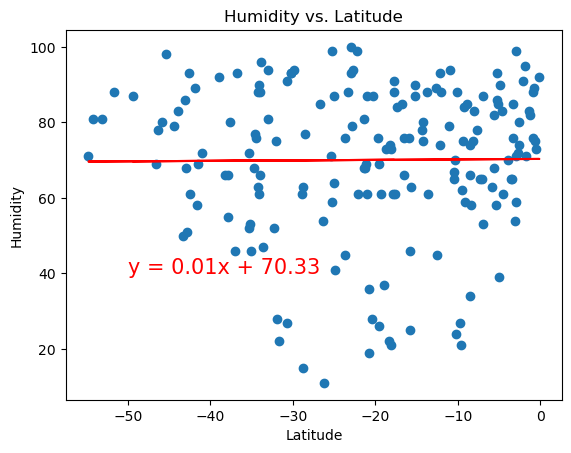

In [23]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df['Humidity']
plot_linear_regression(x, y, "Latitude", "Humidity", "Humidity vs. Latitude", (-50,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

 r-value is: 0.014731264811076124


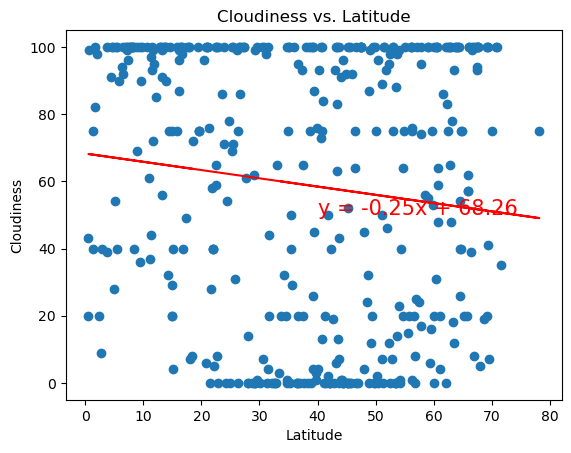

In [24]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df['Cloudiness']
plot_linear_regression(x, y, "Latitude", "Cloudiness", "Cloudiness vs. Latitude", (40,50))

 r-value is: 0.03266079424791421


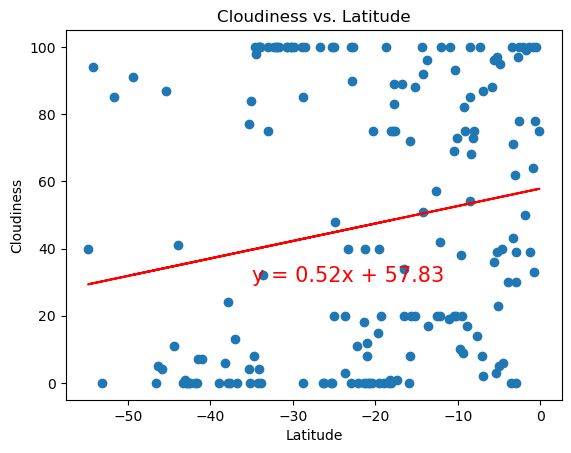

In [25]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df['Cloudiness']
plot_linear_regression(x, y, "Latitude", "Cloudiness", "Cloudiness vs. Latitude", (-35,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

 r-value is: 0.0008195546204188294


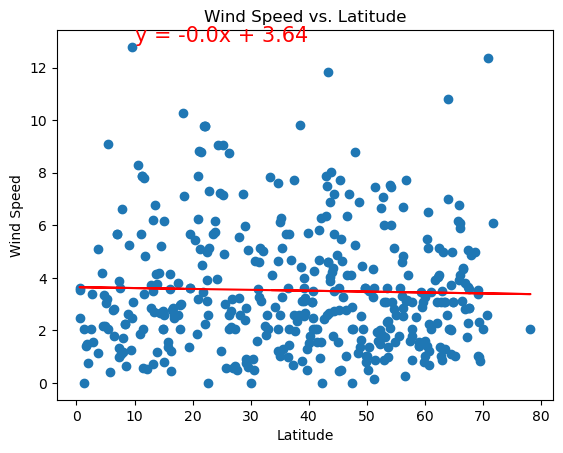

In [26]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df['Wind Speed']
plot_linear_regression(x, y, "Latitude", "Wind Speed", "Wind Speed vs. Latitude", (10,13))

 r-value is: 0.018625251648077823


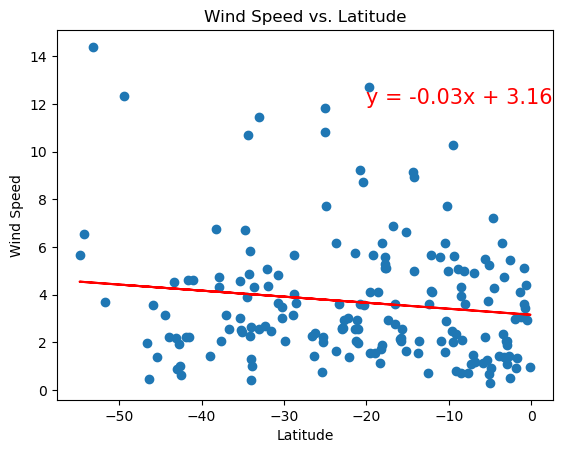

In [27]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df['Wind Speed']
plot_linear_regression(x, y, "Latitude", "Wind Speed", "Wind Speed vs. Latitude", (-20,12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE